# Домашняя работа №5

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests
import seaborn as sns
from scipy.stats import pearsonr

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import scipy.stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [184]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [185]:
len(data[data['Dataset']==2])

167

In [186]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

### Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

c:\users\ivnat\projects\netology\pyda-10\statistics_python_old_hw_5\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


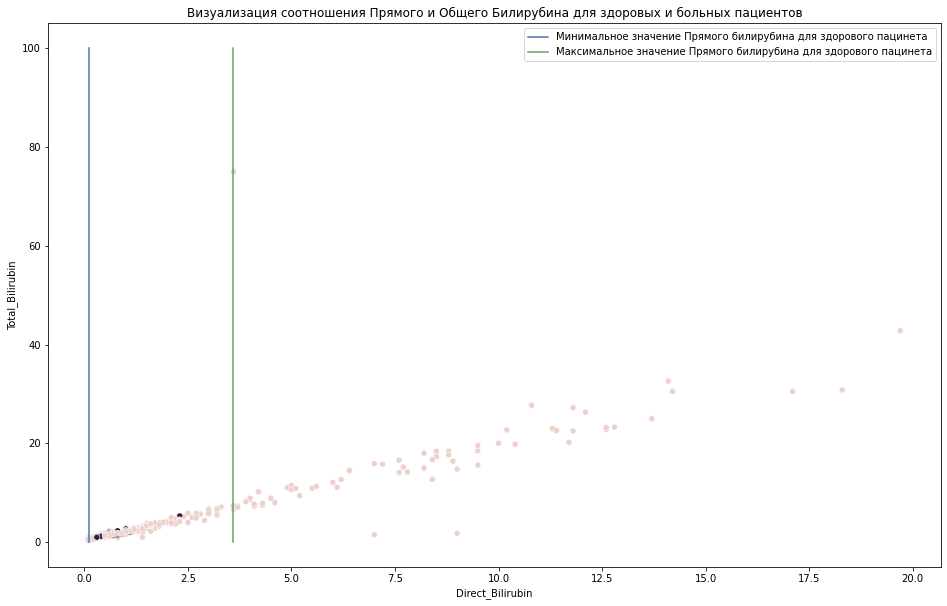

In [187]:
fig, axes = plt.subplots( figsize=[16,10])
sns.scatterplot(data['Direct_Bilirubin'], data['Total_Bilirubin'], hue=data['Dataset'])
plt.plot([min(data[ data['Dataset'] == 2 ]['Direct_Bilirubin']), min(data[ data['Dataset'] == 2 ]['Direct_Bilirubin'])], [0, 100])
plt.plot([max(data[ data['Dataset'] == 2 ]['Direct_Bilirubin']), max(data[ data['Dataset'] == 2 ]['Direct_Bilirubin'])], [0, 100])

plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.legend(['Минимальное значение Прямого билирубина для здорового пацинета',
            'Максимальное значение Прямого билирубина для здорового пацинета'])
plt.title('Визуализация соотношения Прямого и Общего Билирубина для здоровых и больных пациентов')
plt.show()


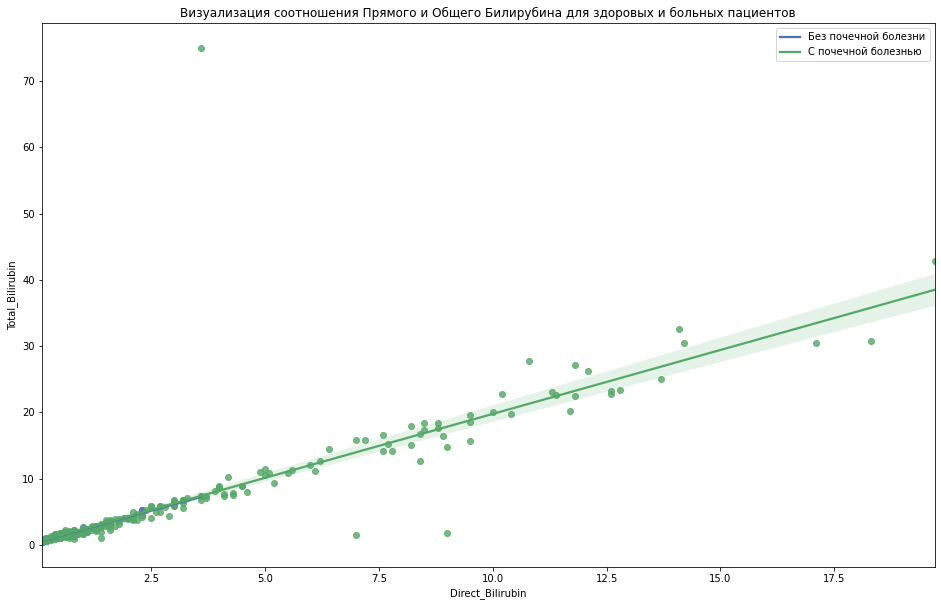

In [188]:
fig1 = plt.subplots( figsize=[16,10])
sns.regplot(
    x=data[ data['Dataset'] == 2 ]['Direct_Bilirubin'],
    y=data[ data['Dataset'] == 2 ]['Total_Bilirubin'],
    fit_reg=True
)
sns.regplot(
    x=data[ data['Dataset'] == 1 ]['Direct_Bilirubin'],
    y=data[ data['Dataset'] == 1 ]['Total_Bilirubin'],
    fit_reg=True
)

plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.legend(['Без почечной болезни',
            'С почечной болезнью'])
plt.title('Визуализация соотношения Прямого и Общего Билирубина для здоровых и больных пациентов')

plt.show()

**Вывод:** Визуальный анализ показывает наличие положительной корреляции между прямым и общим билирубином как у здоровых, так и у больных почечными болезными пациентов.


In [189]:
r, p = pearsonr(data['Direct_Bilirubin'], data['Total_Bilirubin'])
print(
    f'Коэффициент корреляции: {r}\n',
    f'P-value: {p}'
)
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

Коэффициент корреляции: 0.874617930116413
 P-value: 7.873553178030881e-185
Probably dependent


**Вывод:** Анализ корреляции с помощью теста Пирсона подтверждает выводы визуального анализа.
Корреляция положительная, составляет 0,87. Результат теста статистически значим.

### Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [190]:
dir_bil = np.array(data['Direct_Bilirubin']).reshape(-1,1)
total_bil = np.array(data['Total_Bilirubin']).reshape(-1,1)

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(
    dir_bil,
    total_bil,
    test_size = 0.2
)

model.fit(X_train, y_train)

predicted_y = model.predict(X_test)

In [191]:
print(
    f'Среднеквадратичная ошибка: {round(mean_squared_error(y_test, predicted_y), 3)} \n'
    f'Средний модуль отклонения: {round(mean_absolute_error(y_test, predicted_y), 3)}'
)

print(
    f'Доля дисперсии зависимой переменной total_bil, объясняемая регрессионной моделью: {round(model.score(X_train, y_train), 2)}%'
)



Среднеквадратичная ошибка: 3.851 
Средний модуль отклонения: 0.476
Доля дисперсии зависимой переменной total_bil, объясняемая регрессионной моделью: 0.76%


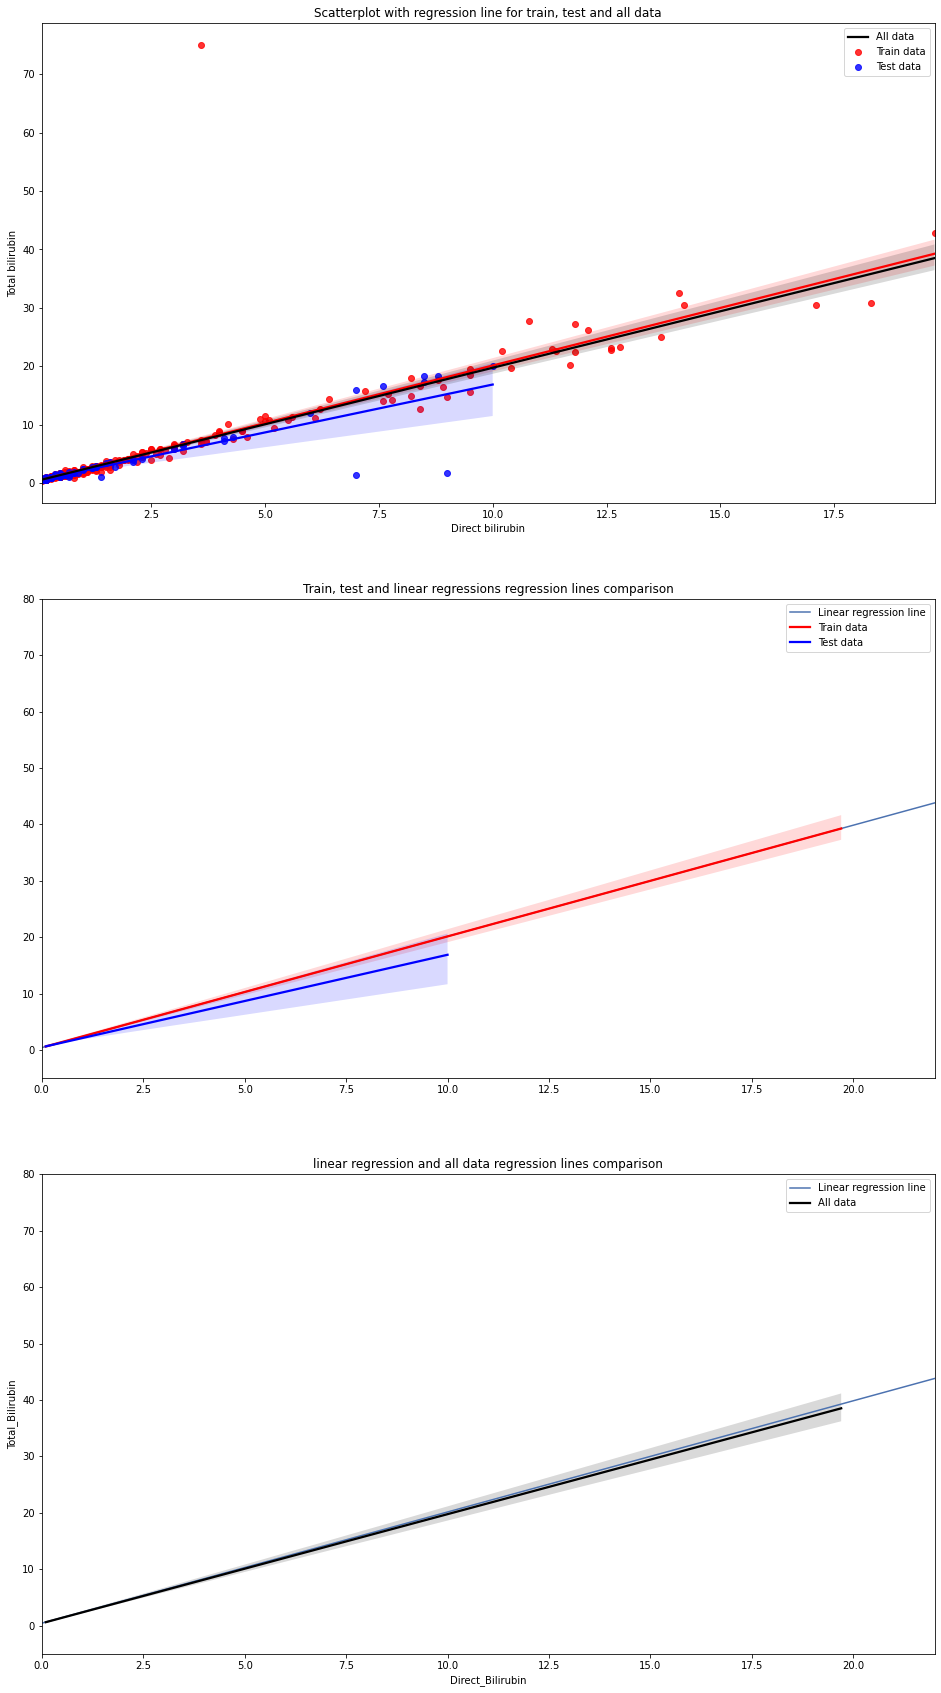

In [192]:
fig2, (axes1, axes2, axes3) = plt.subplots(3,1, figsize=(16,30))

#axes 1, train, test and all data comparison
sns.regplot(x= X_train, y=y_train, data=data, fit_reg=True, color='r', label='Train data', ax=axes1)
sns.regplot(x= X_test, y=y_test, data=data, fit_reg=True, color='b', label='Test data', ax=axes1)
sns.regplot(x=data['Direct_Bilirubin'], y=data['Total_Bilirubin'], scatter=False, color='k', label='All data', ax=axes1)

axes1.set(xlabel='Direct bilirubin', ylabel='Total bilirubin')
axes1.legend()
axes1.set_title('Scatterplot with regression line for train, test and all data')

#axes 2, train, test and linear regressions regression lines comparison
x = np.linspace(-5, 35, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)

axes2.plot(x,y, label='Linear regression line')
sns.regplot(x= X_train, y=y_train, data=data, fit_reg=True ,scatter=False ,  color='r', label='Train data', ax=axes2)
sns.regplot(x= X_test, y=y_test, data=data, fit_reg=True ,scatter=False , color='b', label='Test data', ax=axes2)

axes2.set_xlim(0,22)
axes2.set_ylim(-5,80)
axes2.legend()
axes2.set_title('Train, test and linear regressions regression lines comparison')

#axes 3, linear regression and all data regression lines comparison

axes3.plot(x,y, label='Linear regression line')
sns.regplot(x=data['Direct_Bilirubin'], y=data['Total_Bilirubin'], scatter=False, color='k', label='All data', ax=axes3)

axes3.set_xlim(0,22)
axes3.set_ylim(-5,80)
axes3.legend()
axes3.set_title('linear regression and all data regression lines comparison')

plt.show()

Пример, как считать квантили:

In [193]:
age = data['Age']

In [194]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [195]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Посчитать квартили для всех **колонок**.

In [196]:
data.describe()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

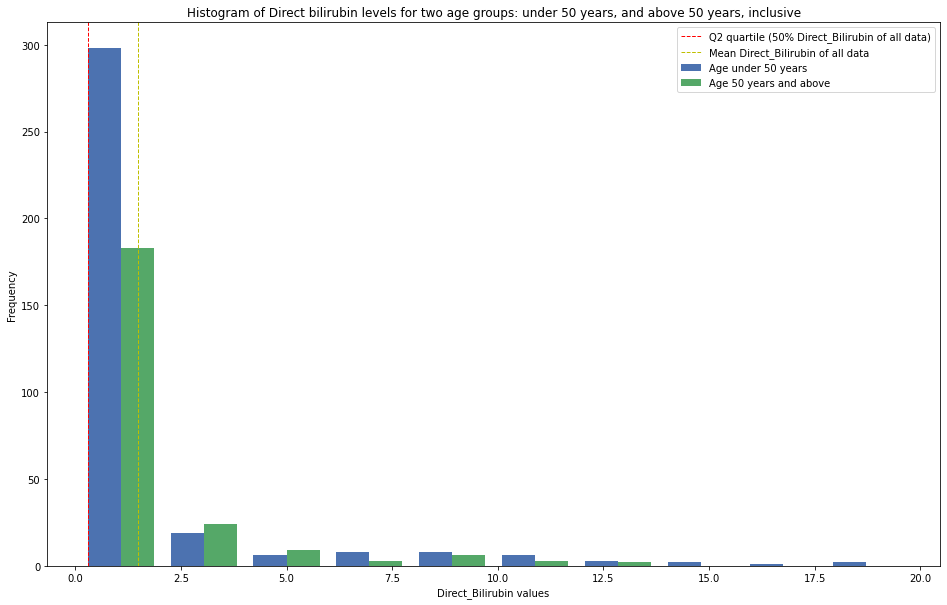

In [197]:
fig4, axes4 = plt.subplots( figsize=(16,10))


quart_2_all = np.quantile(data['Direct_Bilirubin'], .50)
mean_all = data['Direct_Bilirubin'].mean()

plt.style.use('seaborn-deep')
plt.hist(
    [
        data[data['Age'] < 50 ]['Direct_Bilirubin'],
        data[data['Age'] >= 50 ]['Direct_Bilirubin']
    ],
         label=['Age under 50 years', 'Age 50 years and above']
)

plt.axvline( x= quart_2_all, color='r', linestyle='dashed', linewidth=1, label='Q2 quartile (50% Direct_Bilirubin of all data)')    #квартиль Q2
plt.axvline( x= mean_all, color='y', linestyle='dashed', linewidth=1, label='Mean Direct_Bilirubin of all data')    #среднее

plt.xlabel('Direct_Bilirubin values')
plt.ylabel('Frequency')

plt.legend()
plt.title('Histogram of Direct bilirubin levels for two age groups: under 50 years, and above 50 years, inclusive')
plt.show()

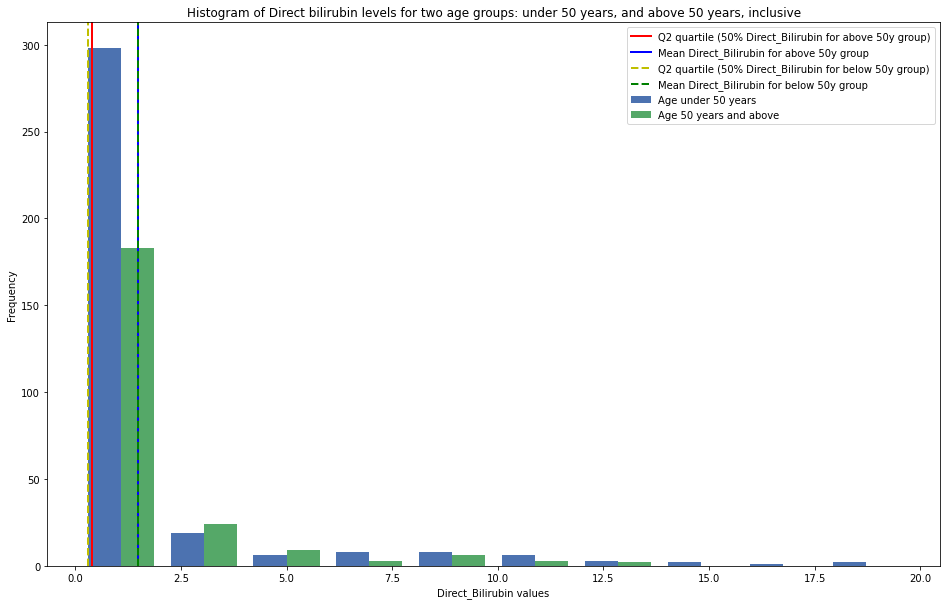

In [198]:
fig5 = plt.figure(figsize=(16,10))

quart_2_old = np.quantile(data[ data['Age'] >= 50 ]['Direct_Bilirubin'], .50)
mean_old = data[ data['Age'] >= 50 ]['Direct_Bilirubin'].mean()

quart_2_young = np.quantile(data[ data['Age'] < 50 ]['Direct_Bilirubin'], .50)
mean_young = data[ data['Age'] < 50 ]['Direct_Bilirubin'].mean()

plt.style.use('seaborn-deep')
plt.hist(
    [
        data[data['Age'] < 50 ]['Direct_Bilirubin'],
        data[data['Age'] >= 50 ]['Direct_Bilirubin']
    ],
         label=['Age under 50 years', 'Age 50 years and above']
)

plt.axvline( x= quart_2_old, color='r', linewidth=2, label='Q2 quartile (50% Direct_Bilirubin for above 50y group)')    #квартиль Q2
plt.axvline( x= mean_old, color='b', linewidth=2, label='Mean Direct_Bilirubin for above 50y group')    #среднее

plt.axvline( x= quart_2_young, linestyle='dashed', color='y' , linewidth=2, label='Q2 quartile (50% Direct_Bilirubin for below 50y group)')    #квартиль Q2
plt.axvline( x= mean_young, linestyle='dashed', color='g', linewidth=2, label='Mean Direct_Bilirubin for below 50y group')    #среднее

plt.xlabel('Direct_Bilirubin values')
plt.ylabel('Frequency')

plt.legend()
plt.title('Histogram of Direct bilirubin levels for two age groups: under 50 years, and above 50 years, inclusive')
plt.show()

In [199]:
print(
    f'Mean for below 50y: {round(mean_young, 5)}, mean for above 50y group: {round(mean_old, 5)}\n',
    f'Q2 or Median for below 50y group: {quart_2_young}, Q2 or Median for above 50y group: {quart_2_old} '
)

Mean for below 50y: 1.49462, mean for above 50y group: 1.47304
 Q2 or Median for below 50y group: 0.3, Q2 or Median for above 50y group: 0.4 


**Вывод:** Мат.ожидания и медианные значения уровней прямого билирубина для двух возрастных групп практически одинаковые.
При этом гистограма частотности уровней показывает неравномерность распределения уровней среди двух возрастных групп.


### Посчитать критерий одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей.
Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)?
Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента.
alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных  - 1).
Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

In [200]:
liver_disease = data[ data['Dataset'] == 1 ]['Total_Bilirubin']
all = data['Total_Bilirubin'].mean()

T, p = st.ttest_1samp(liver_disease, all)

print(
    f'T-statistics (насколько выборочное среднее отличается от среднего ген.совокупности в единицах ст.ошибок): {round(T, 3)}\n'
    f'P-value: {p}\n'
    f'df: {len(liver_disease)-1}'
)
if p > 0.05:
    print('Недостаточно оснований отвергнуть 0 гипотезу. Принадлежит ген.совокупности')
else:
    print('Достаточно оснований отвергнуть 0 гипотезу. Не принадлежит ген.совокупности')

T-statistics (насколько выборочное среднее отличается от среднего ген.совокупности в единицах ст.ошибок): 2.471
P-value: 0.013871861207640133
df: 415
Достаточно оснований отвергнуть 0 гипотезу. Не принадлежит ген.совокупности


Среднее генеральной совокупности (не болеющие) не входит в 95% доверительный интервал выборки.
Значений т-критерия говорит о том, что среднее ген.совокупности меньше ср.выборки.
И на графике лежит в 8,6 (левее) ст.ошибок от ср.выборки.

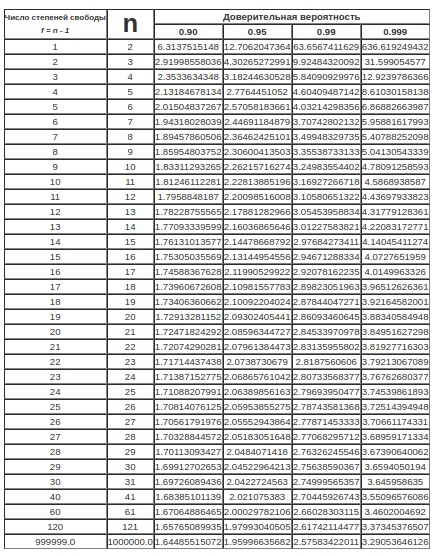

In [201]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Количество степеней свободы - 415
Доверительная вероятность - 0,95
T-значение - 2,47
Табличное пороговое значение - 1,67

Достаточно оснований отклонить 0 гипотезу о равенстве средних.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [202]:
liver_disease = data[ data['Dataset'] == 1 ]['Total_Bilirubin']
healthy = data[ data['Dataset'] == 2 ]['Total_Bilirubin']

T, p = st.ttest_ind(liver_disease, healthy)

print(
    f'T-statistics (насколько среднее значение Total_Bilirubin для больных отличается от среднего для здоровых в единицах суммарного ст.отклонения): {round(T, 3)}\n'
    f'P-value: {p}\n'
    f'df: {len(liver_disease)-1}'
)
if p > 0.05:
    print('Недостаточно оснований отвергнуть 0 гипотезу. Принадлежат к одной ген.совокупности')
else:
    print('Достаточно оснований отвергнуть 0 гипотезу. Не принадлежат к одной ген.совокупности')


T-statistics (насколько среднее значение Total_Bilirubin для больных отличается от среднего для здоровых в единицах суммарного ст.отклонения): 5.441
P-value: 7.801430929364345e-08
df: 415
Достаточно оснований отвергнуть 0 гипотезу. Не принадлежат к одной ген.совокупности


Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** -
1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset.
Сравнить с реальностью: будут ли эти группы отличаться в дейстивельности (на ваш взгляд).

In [203]:
# заменим 2 на 0 для удобства восприятния

data['Dataset'].replace(2, 0, inplace=True)
data['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [204]:
group1 = data[ data['Age'] < 30 ]['Dataset']
group2 = data[(data['Age'] >= 30) & (data['Age'] < 55) ]['Dataset']
group3 = data[ data['Age'] >= 55 ]['Dataset']

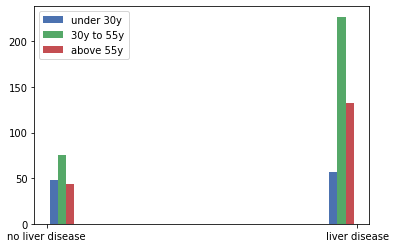

In [212]:
fig = plt.figure()

all_groups = [group1, group2, group3]

plt.hist(all_groups)

plt.legend(['under 30y', '30y to 55y', 'above 55y'])
plt.xticks([0, 1], ['no liver disease', 'liver disease'])
plt.show()


In [206]:
F, p = st.f_oneway(group1, group2, group3)

print(
    f'F-statistics: {F}\n'
    f'P-value: {p}\n'
)
if p > 0.05:
    print('Недостаточно оснований отвергнуть 0 гипотезу. Принадлежат к одной ген.совокупности, все средние равны ср. ген. совокупности')
else:
    print('Достаточно оснований отвергнуть 0 гипотезу. Среднее как минимум одной группы отличается')

F-statistics: 9.375048806025259
P-value: 9.837730889092287e-05

Достаточно оснований отвергнуть 0 гипотезу. Среднее как минимум одной группы не равно


In [207]:
# Используем критерий Тьюки, чтобы визуаоизировать результаты ANOVA
# подготовка данных

under_30y = pd.DataFrame(group1)
under_30y['group'] = 'under_30y'

from30y_to_55y = pd.DataFrame(group2)
from30y_to_55y['group'] = 'from30y_to_55y'

above_55y = pd.DataFrame(group3)
above_55y['group'] = 'above_55y'

all_groups_df = under_30y.append(from30y_to_55y).append(above_55y)
all_groups_df

,Dataset,group
6,1,under_30y
7,1,under_30y
8,0,under_30y
15,0,under_30y
28,0,under_30y
...,...,...
561,1,above_55y
562,1,above_55y
563,1,above_55y
571,1,above_55y


In [214]:
results = pairwise_tukeyhsd(endog=all_groups_df['Dataset'], groups=all_groups_df['group'], alpha=0.05)
results._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
above_55y,from30y_to_55y,0.0017,0.9,-0.0978,0.1011,False
above_55y,under_30y,-0.2071,0.001,-0.3364,-0.0779,True
from30y_to_55y,under_30y,-0.2088,0.001,-0.3276,-0.09,True


c:\users\ivnat\projects\netology\pyda-10\statistics_python_old_hw_5\venv\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


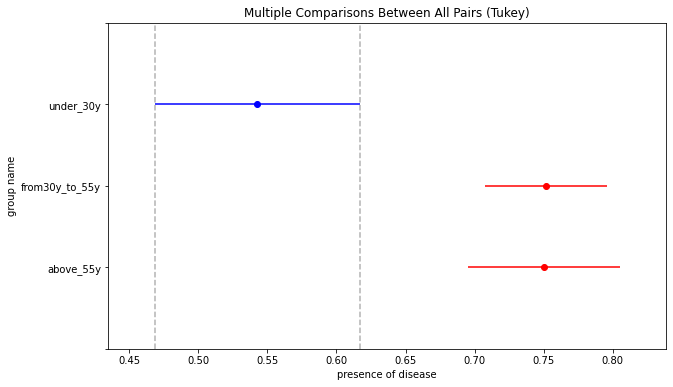

In [215]:
results.plot_simultaneous(comparison_name='under_30y', ax=None, figsize=(10, 6), xlabel='presence of disease, rate', ylabel='group name')
plt.show()

**Вывод:** данные достаточно хорошо соотносятся с общепринятым представлением -
вероятность заболеть с возрастом увеличивается.
Возможно, на большем объеме данных проявление болезни было более линейно в зависимости от возраста.